<a href="https://colab.research.google.com/github/evan15900/Lee113/blob/main/HW03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW03 Data Analysis

## 標題：歷年來台旅客國籍數據分析報告

## 摘要

本報告根據交通部觀光署提供的統計資料，從旅客國籍分布比例、趨勢以及不同國家之間數量差異的多方面角度，分析2002至2024歷年來台旅客國籍數據。其中將數據視覺化獲得更直觀的觀察效果，能夠更簡單地發現問題點並提出適合的建議。

## 引言

### 背景
觀光是許多國家相當重視的產業之一，對於台灣來說也是不容忽視的一部分，除了能帶來商機之外，也能了解在外國人眼中的我們是什麼樣子。而旅遊的目的地不只會受到距離的影響(機票與飛行時間)，還會隨著文化考量而產生不同選擇(如飲食、信仰、物價、治安等等)。因此分析不同區域、國籍來台旅客的數量，可以了解哪些地方對台灣較有興趣或較無興趣並進行對應的策略。

### 目的
本研究的目標是透過數據分析，得知不同國家、區域對台灣的感興趣程度，再提供可行的建議了解外國旅客心聲，讓台灣成為更適合觀光的國家，提升在國際上的形象。

### 待答問題
1. 來台遊客的國籍(區域)分布比例？
2. 全球與各區域來台遊客的趨勢？
3. 不同國家來台遊客的數量差異？

## 方法

### 數據來源
[政府資料開放平台 - 歷年來台旅客國籍統計](https://data.gov.tw/dataset/45537)

該數據集包含2002年至2024年外國來台旅客的數量並以國籍和細分做區分。

(不包含中國推測是為了避免政治議題)

### 分析工具
- **Python**（數據處理與分析）
- **Pandas**（數據清理與統計分析）
- **Matplotlib / Seaborn**（數據視覺化）

### 數據處理
1. 載入公開數據集並檢視數據概況。
2. 將資料內的數據處理成方便進行分析的樣態。
3. 繪製圓餅圖、折線圖、長條圖，分析關鍵變數之間的關係。

In [ ]:
import pandas as pd
url = 'https://quality.data.gov.tw/dq_download_csv.php?nid=45537&md5_url=1d2cd2097852198c1173a8ffb73c1021'
df = pd.read_csv(url)
df.head()

,國籍,細分,2002,2003,2004,2005,2006,2007,2008,2009,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,亞洲地區,日本 Japan,"991,224","659,972","890,444","1,127,184","1,163,835","1,170,582","1,090,585","1,007,618",...,"1,629,193","1,896,456","1,895,546","1,966,303","2,162,426","268,798","9,910","87,133","926,140","1,318,372"
1,亞洲地區,韓國 Korea,"84,354","94,060","149,182","184,559","198,507","228,582","252,973","170,646",...,"662,670","887,412","1,055,207","1,021,530","1,245,144","179,190","3,165","51,480","745,885","1,010,035"
2,亞洲地區,東南亞地區 越南 Vietnam,-,-,-,-,-,-,"81,274","68,204",...,"143,930","194,323","380,833","490,699","404,570","110,053","24,872","135,356","382,026","370,802"
3,亞洲地區,東南亞地區 泰國 Thailand,"105,412","98,056","101,784","92,342","94,191","88,947","83,968","80,712",...,"121,337","193,200","289,801","317,086","410,385","63,303","7,534","74,356","391,573","397,168"
4,亞洲地區,東南亞地區 馬來西亞 Malaysia,"75,659","75,869","105,246","123,961","132,996","159,839","171,630","184,577",...,"458,401","500,496","552,620","548,947","560,099","74,788","6,188","60,742","463,292","463,216"


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   國籍      44 non-null     object
 1   細分      44 non-null     object
 2   2002    44 non-null     object
 3   2003    44 non-null     object
 4   2004    44 non-null     object
 5   2005    44 non-null     object
 6   2006    44 non-null     object
 7   2007    44 non-null     object
 8   2008    44 non-null     object
 9   2009    44 non-null     object
 10  2010    44 non-null     object
 11  2011    44 non-null     object
 12  2012    44 non-null     object
 13  2013    44 non-null     object
 14  2014    44 non-null     object
 15  2015    44 non-null     object
 16  2016    44 non-null     object
 17  2017    44 non-null     object
 18  2018    44 non-null     object
 19  2019    44 non-null     object
 20  2020    44 non-null     object
 21  2021    44 non-null     object
 22  2022    44 non-null     obje

In [ ]:
#去除數據中的逗號並將減號替換掉
year_columns = df.columns.drop(['國籍', '細分'])
for col in year_columns:
    df[col] = df[col].astype(str).str.replace(',', '', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.head()

,國籍,細分,2002,2003,2004,2005,2006,2007,2008,2009,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,亞洲地區,日本 Japan,991224.0,659972.0,890444.0,1127184.0,1163835.0,1170582.0,1090585,1007618,...,1629193,1896456,1895546,1966303,2162426,268798,9910,87133,926140,1318372
1,亞洲地區,韓國 Korea,84354.0,94060.0,149182.0,184559.0,198507.0,228582.0,252973,170646,...,662670,887412,1055207,1021530,1245144,179190,3165,51480,745885,1010035
2,亞洲地區,東南亞地區 越南 Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,81274,68204,...,143930,194323,380833,490699,404570,110053,24872,135356,382026,370802
3,亞洲地區,東南亞地區 泰國 Thailand,105412.0,98056.0,101784.0,92342.0,94191.0,88947.0,83968,80712,...,121337,193200,289801,317086,410385,63303,7534,74356,391573,397168
4,亞洲地區,東南亞地區 馬來西亞 Malaysia,75659.0,75869.0,105246.0,123961.0,132996.0,159839.0,171630,184577,...,458401,500496,552620,548947,560099,74788,6188,60742,463292,463216


In [ ]:
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

--2025-06-13 09:11:25--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 172.253.115.101, 172.253.115.100, 172.253.115.102, ...
Connecting to drive.google.com (drive.google.com)|172.253.115.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-06-13 09:11:25--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.179.132, 2607:f8b0:4004:c21::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.179.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘taipei_sans_tc_beta.ttf’

taipei_sans_tc_beta 100%[===================>]  19.70M  45.7MB/s    in 0.4s    

2025-06-13 09:11

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
# 新增字體
matplotlib.font_manager.fontManager.addfont('taipei_sans_tc_beta.ttf')
# 設定中文字型及負號正確顯示
plt.rcParams['font.sans-serif'] = 'Taipei Sans TC Beta'
plt.rcParams["axes.unicode_minus"] = False

## 結果與分析

### 來台遊客的國籍(區域)分布比例
使用圓餅圖來觀察

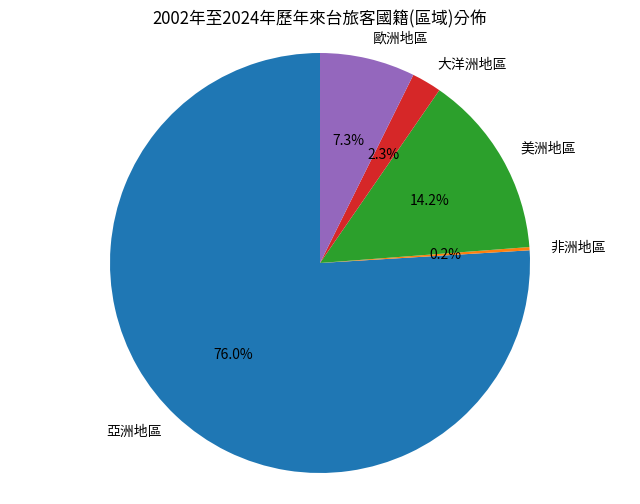

In [ ]:
selected_rows = df.iloc[[13, 16, 23, 27, 40]]
selected_data = selected_rows.drop(['國籍', '細分'], axis=1)
row_sums = selected_data.sum(axis=1)
labels = df.iloc[[13, 16, 23, 27, 40]]['國籍']


plt.figure(figsize=(8, 6))
plt.pie(row_sums, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('2002年至2024年歷年來台旅客國籍(區域)分佈')
plt.axis('equal')
plt.show()

**分析結果**：從圖中可以看出亞洲旅客占大多數，其他區域的比例排名依序為美洲、歐洲、大洋洲、非洲。

### 全球與各區域來台遊客的趨勢
使用折線圖來觀察

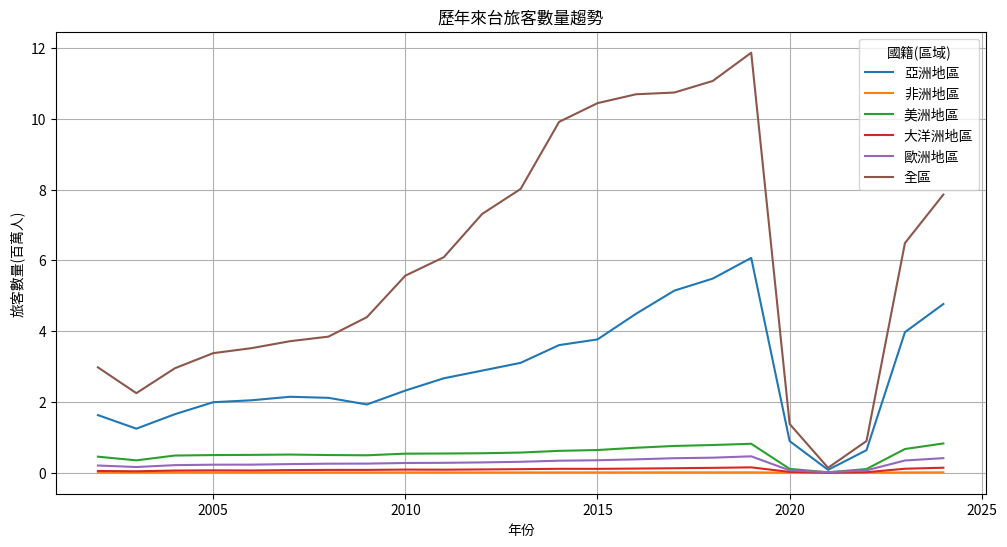

In [ ]:
selected_rows = df.iloc[[13, 16, 23, 27, 40, 43]]
selected_data = selected_rows.drop(['國籍', '細分'], axis=1)
selected_data_T = selected_data.T
labels = df.iloc[[13, 16, 23, 27, 40, 43]]['國籍']
selected_data_T.index = pd.to_numeric(selected_data_T.index, errors='coerce')
selected_data_T_millions = selected_data_T / 1_000_000


plt.figure(figsize=(12, 6))
for i, label in enumerate(labels):
    plt.plot(selected_data_T_millions.index, selected_data_T_millions[selected_data_T_millions.columns[i]], label=label)
plt.title('歷年來台旅客數量趨勢')
plt.xlabel('年份')
plt.ylabel('旅客數量(百萬人)')
plt.legend(title='國籍(區域)')
plt.grid(True)
plt.show()

**分析結果**：從圖中能發現，2004年至2019年為止來台旅客數量是增加的趨勢，亞洲旅客帶來極大的影響。而2020年至2022年因為遇到疫情，旅客數量呈現雪崩式下跌，直到2023年全球生活逐漸恢復才開始回升。

### 不同國家來台遊客的數量差異
使用長條圖進行分析。

<ipython-input-31-2023086672>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['總計旅客數'] = df_filtered[year_columns].sum(axis=1)


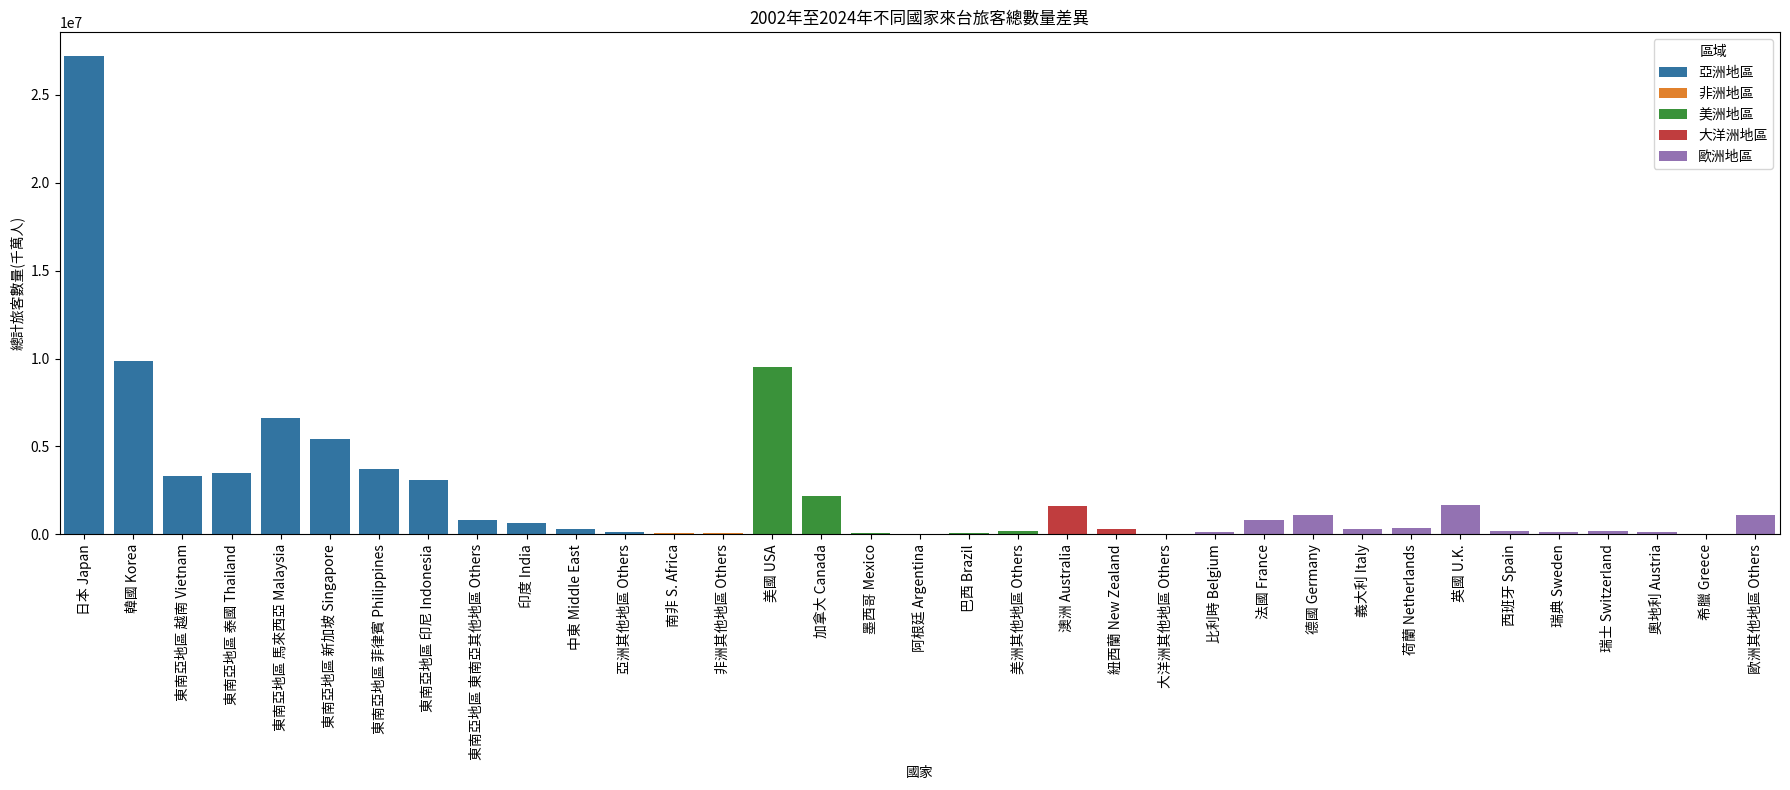

In [ ]:
rows_to_exclude = [10, 14, 17, 24, 28, 41, 42, 43, 44]
all_rows = df.index.tolist()
rows_to_include = [row for row in all_rows if row + 1 not in rows_to_exclude]
df_filtered = df.iloc[rows_to_include]
year_columns = df_filtered.columns.drop(['國籍', '細分'])
df_filtered['總計旅客數'] = df_filtered[year_columns].sum(axis=1)
plot_data = df_filtered[['國籍', '細分', '總計旅客數']]


plt.figure(figsize=(18, 8))
sns.barplot(data=plot_data, x='細分', y='總計旅客數', hue='國籍')
plt.title('2002年至2024年不同國家來台旅客總數量差異')
plt.xlabel('國家')
plt.ylabel('總計旅客數量(千萬人)')
plt.xticks(rotation=90)
plt.legend(title='區域')
plt.tight_layout()
plt.show()

**分析結果**：
- 整體來說最常來台的是日本人。
- 亞洲旅客以日、韓居多。
- 雖然總數量相當少，但最常來台旅遊的非洲國家是南非，因此可以獨立成一項。
- 美洲來台旅客以北美兩大國為宗，美國旅客甚至與韓國旅客差不多數量。
- 大洋洲中澳洲旅客佔多數，總數量甚至與英國旅客差不多。
- 歐洲旅客以英、德、法為主。


## 結論與建議


### 結論(因資料未提及，故不討論中國旅客)
1. 來台旅客大多數來自亞洲，可能是因為距離近以及文化差異不大的緣故。而其他距離較遠或文化差異較大的區域，旅客人數明顯少很多。
2. 疫情前來台旅客數量逐年成長，顯示台灣觀光方面的發展以及對亞洲國家的吸引力。而疫情之後有回升趨勢，可看出台灣的觀光仍有興盛起來的潛能。
3. 各區域除了亞洲，疫情時期以外的旅客數量皆無明顯增減趨勢，可能台灣的觀光吸引力對於他們並沒有隨著時間而有太大差別。
4. 東方來台旅客以日、韓為主，而東南亞旅客數量也不容忽視。西方來台旅客則以美、加、英、澳洲為主。

### 建議
1. 鞏固亞洲來源：
  - 提供外國旅客觀光優惠
  - 觀光產業價格透明化，不坑殺觀光客
  - 持續推廣台灣特色文化、風景以及美食
  - 改善市容，營造乾淨、整齊、安全的旅遊氛圍
2. 在機場鼓勵旅客填寫問卷，詢問他們來台旅遊的原因以及離開時印象深刻的點、需要改進的點，藉此了解並分析非亞洲旅客對台灣的意見來思考對應的具體策略。


